In [225]:
# Reading data from a file
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
rawdata = pd.read_csv(url, names=names)

In [226]:
rawdata.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [227]:
# Tracking missing data
print(rawdata.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [228]:
# Replace the 0 values in the columns with the mean of the column
import numpy as np
rawdata.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [229]:
for i in rawdata.columns:
  if i!='class':
    rawdata[i].replace(0,rawdata[i].mean(), inplace = True)
  
rawdata

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [230]:
# Handling Categorical Data 
categoryColumn=rawdata._get_numeric_data().columns
categoryColumn

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

In [231]:
columns=rawdata.columns
CategoricalList=list(set(categoryColumn)-set(columns))
CategoricalList

[]

In [232]:
#step 7:Partitioning a dataset into separate training and testing sets Train:80 Test:2

In [233]:
from sklearn.model_selection import train_test_split
X,Y=rawdata.iloc[:,:7].values,rawdata.iloc[:,8].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0,stratify=Y)
print(X_train)
print(Y_train)

[[7.00000000e+00 1.96000000e+02 9.00000000e+01 ... 7.97994792e+01
  3.98000000e+01 4.51000000e-01]
 [2.00000000e+00 8.10000000e+01 7.20000000e+01 ... 7.60000000e+01
  3.01000000e+01 5.47000000e-01]
 [2.00000000e+00 1.27000000e+02 5.80000000e+01 ... 2.75000000e+02
  2.77000000e+01 1.60000000e+00]
 ...
 [3.00000000e+00 8.20000000e+01 7.00000000e+01 ... 7.97994792e+01
  2.11000000e+01 3.89000000e-01]
 [7.00000000e+00 1.03000000e+02 6.60000000e+01 ... 7.97994792e+01
  3.91000000e+01 3.44000000e-01]
 [3.84505208e+00 1.61000000e+02 5.00000000e+01 ... 7.97994792e+01
  2.19000000e+01 2.54000000e-01]]
[1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0
 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 1 0 1 0 

In [234]:
#step 8: Normalization using min-max scaling (needed to ensure that all features are defined on the same numeric scale, thus avoiding data bias)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [235]:
print(X_train_norm)

[[0.375      0.98064516 0.67346939 ... 0.07908591 0.44171779 0.15926558]
 [0.0625     0.23870968 0.48979592 ... 0.07451923 0.24335378 0.20025619]
 [0.0625     0.53548387 0.34693878 ... 0.31370192 0.19427403 0.6498719 ]
 ...
 [0.125      0.24516129 0.46938776 ... 0.07908591 0.0593047  0.13279249]
 [0.375      0.38064516 0.42857143 ... 0.07908591 0.42740286 0.11357814]
 [0.17781576 0.75483871 0.26530612 ... 0.07908591 0.07566462 0.07514944]]


In [236]:
# Task 1 Implementation-Perceptron algorithm

In [237]:
import numpy as np


class Perceptron:
    def __init__(self, learning_rate=0.01, noof_iters=1000):
        self.noof_iters = noof_iters
        self.learn = learning_rate
        self.weights = None
        self.bias = None
        self.activation_func = self._unit_step_func
        
        

    def fit(self, X, y):
        n_samples, n_features = X.shape
        errors = []

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.noof_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                #How did you decide to terminate the training process referred to in Task 1 above?
                #In the model we used trail and error the noof iterations 100 and 1000 the accuracy remains same after 100
                # we can even exist the loop when there is no change in the loss function.
                update = self.learn * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update
                

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)




   

Coefficients [ 0.02244792  0.02969985 -0.01669643 -0.01086221  0.00360007  0.03680279
 -0.00602477]
Perceptron classification accuracy 0.7597402597402597


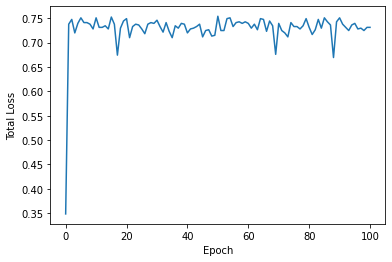

In [238]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    def loss_function(n):
      loss=[]
      for i in range(n+1):
        p = Perceptron(learning_rate=0.01, noof_iters=i)
        p.fit(X_train_norm, Y_train)
        predictions = p.predict(X_train_norm)
        loss.append(accuracy(Y_train, predictions))
      plt.plot(loss)
      plt.xlabel('Epoch')
      plt.ylabel('Total Loss')
    

          

    
#Task 2 Model training
#How did you decide to terminate the training process referred to in Task 1 above?

    p = Perceptron(learning_rate=0.01, noof_iters=100)
    p.fit(X_train_norm, Y_train)
    predictions = p.predict(X_test_norm)
    
    #1a)For each of the two methods, produce a visualization of the loss function with the number of training epochs. 

    loss_function(100)

 #1b)Display the value of the coefficient vector at the end of the training process.
    print("Coefficients",p.weights)
#Task 3 Model evaluation
    print("Perceptron classification accuracy", accuracy(Y_test, predictions))

    

In [239]:
print("Coefficients",p.weights)

Coefficients [ 0.02244792  0.02969985 -0.01669643 -0.01086221  0.00360007  0.03680279
 -0.00602477]


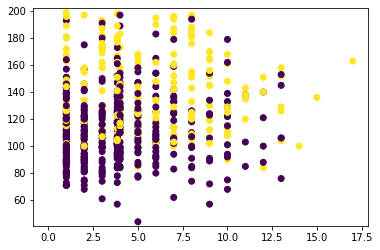

In [240]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=Y_train)

x0_1 = np.amin(X_train_norm[:, 0])
x0_2 = np.amax(X_train_norm[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


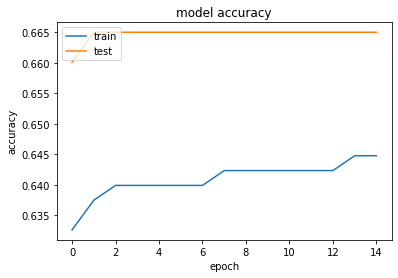

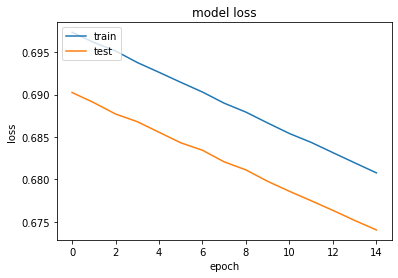

In [241]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
#Task 4 Extending the basic perceptron method
#For the linear perceptron we will employ a divide and conquer method for extension. 
#For each region R currently discovered by the perceptron during training, 
#recursively sub-divide it into two sub-regions R1 and R2 using the same approach you took in Task 1. 
dataset = rawdata
# split into input (X) and output (Y) variables
X = X_train_norm
Y = Y_train
# create model
model = Sequential()
#Task 3 Model evaluation
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [243]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
 
import io
data = pd.read_csv(io.BytesIO(uploaded['german_credit_data.csv']))

Saving german_credit_data.csv to german_credit_data (2).csv


In [244]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Class
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,1
996,40,male,3,own,little,little,3857,30,car,1
997,38,male,2,own,little,NaN,804,12,radio/TV,1
998,23,male,2,free,little,little,1845,45,radio/TV,2


In [245]:
data.isnull().sum()
from sklearn.impute import SimpleImputer

In [246]:
imr=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputed_data=pd.DataFrame();
imr=imr.fit(data[['Saving accounts', 'Checking account']].values)
data[['Saving accounts', 'Checking account']]=imr.transform(data[['Saving accounts', 'Checking account']].values)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Class
0,67,male,2,own,little,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,2
2,49,male,1,own,little,little,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,53,male,2,free,little,little,4870,24,car,2


In [247]:
sex_size_mapping={
    'male' : 1,
    'female' : 0
}
housing_size_mapping={
    'own':1, 'free':0, 'rent':2
}
saving_size_mapping={
    np.nan:4, 'little':0, 'quite rich':2, 'rich':3, 'moderate':1
}
checking_size_mapping={
    'little':0, 'moderate':1, np.nan:3, 'rich':2
}
purpose_size_mapping={
  'radio/TV': 5,'education': 3,'furniture/equipment': 4, 'car': 1, 'business': 0,
 'domestic appliances': 2,'repairs':6 ,'vacation/others':7

}
data['Sex'] = data['Sex'].map(sex_size_mapping)
data['Housing'] = data['Housing'].map(housing_size_mapping)
data['Saving accounts'] = data['Saving accounts'].map(saving_size_mapping)
data['Checking account'] = data['Checking account'].map(checking_size_mapping)
data['Purpose'] = data['Purpose'].map(purpose_size_mapping)
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Class
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,2
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,2


In [248]:
X,Y=data.iloc[:,:8].values,data.iloc[:,9].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=0,stratify=Y)
print(X_train)

[[  27    1    2 ...    0 2463   24]
 [  33    0    2 ...    0 3966   18]
 [  30    0    2 ...    0 7721   24]
 ...
 [  38    0    2 ...    0 1240   12]
 [  20    1    2 ...    2 3617   24]
 [  36    1    2 ...    0 1262   15]]


In [249]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [250]:
data.isnull().sum()
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Class'],
      dtype='object')

In [251]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
X= data[['Purpose','Sex', 'Housing', 'Saving accounts', 'Checking account'
       ]].values
ohe = ColumnTransformer([('anyname',OneHotEncoder(), [0])],remainder='passthrough')
print(ohe.fit_transform(X))


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 1. 1.]]


In [252]:
X=ohe.fit_transform(X)
print(X[:9])
data.Purpose.unique()


[[0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 2. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 2. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 3. 0.]]


array([5, 3, 4, 1, 0, 2, 6, 7])

In [253]:
import numpy as np


class Perceptron:
    def __init__(self, learning_rate=0.01, noof_iters=1000):
        self.noof_iters = noof_iters
        self.learn = learning_rate
        self.weights = None
        self.bias = None
        self.activation_func = self._unit_step_func
        
        

    def fit(self, X, y):
        n_samples, n_features = X.shape
        errors = []

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([2 if i > 1 else 1 for i in y])

        for _ in range(self.noof_iters):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                #Task 2:How did you decide to terminate the training process referred to in Task 1 above?
                #In the model we used trail and error the noof iterations 100 and 1000 the accuracy remains same after 100
                # we can even exist the loop when there is no change in the loss function.
                update = self.learn * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update
                

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 1, 2, 1)

Coefficients [-0.01946429 -0.02       -0.00666667  0.005      -0.02       -0.01
  0.01152278  0.01964286]
Perceptron classification accuracy 0.67


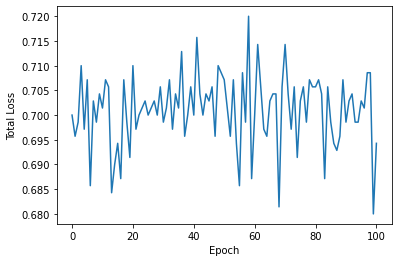

In [254]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    def loss_function(n):
      loss=[]
      for i in range(n+1):
        p = Perceptron(learning_rate=0.01, noof_iters=i)
        p.fit(X_train_norm, Y_train)
        predictions = p.predict(X_train_norm)
        loss.append(accuracy(Y_train, predictions))
      plt.plot(loss)
      plt.xlabel('Epoch')
      plt.ylabel('Total Loss')
    

          

    
#Task 2 Model training
#How did you decide to terminate the training process referred to in Task 1 above?

    p = Perceptron(learning_rate=0.01, noof_iters=100)
    p.fit(X_train_norm, Y_train)
    predictions = p.predict(X_test_norm)
    
    #1a)For each of the two methods, produce a visualization of the loss function with the number of training epochs. 

    loss_function(100)

 #1b)Display the value of the coefficient vector at the end of the training process.
    print("Coefficients",p.weights)
#Task 3 Model evaluation
    print("Perceptron classification accuracy", accuracy(Y_test, predictions))

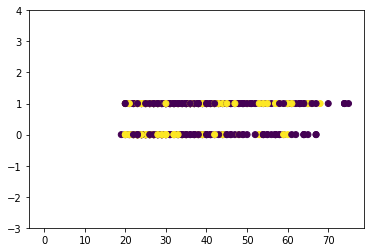

In [255]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=Y_train)

x0_1 = np.amin(X_train_norm[:, 0])
x0_2 = np.amax(X_train_norm[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


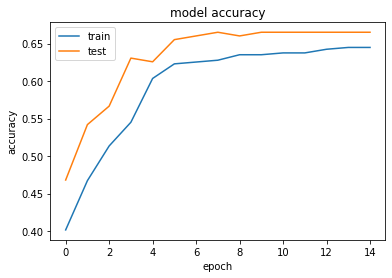

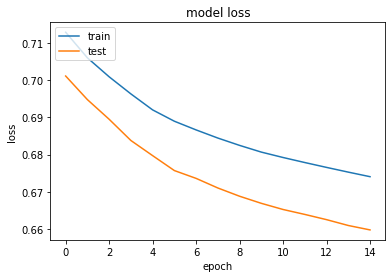

In [242]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
#Task 4 Extending the basic perceptron method
#For the linear perceptron we will employ a divide and conquer method for extension. 
#For each region R currently discovered by the perceptron during training, 
#recursively sub-divide it into two sub-regions R1 and R2 using the same approach you took in Task 1. 
dataset = data
# split into input (X) and output (Y) variables
X = X_train_norm
Y = Y_train
# create model
model = Sequential()

model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#Task 3 Model evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# YADALA RUPESH SAI
#11505782